### 4.9- Part 2
#### 1. Importing libraries and files
#### 2 creating the linechart using the sample subset from random sample
#### 3 Creating linechart using small sample
#### 4 Creating line chart using big sample

#### 1 Import libraries

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### - Import files

In [8]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

In [9]:
df_concat=pd.read_pickle(os.path.join(path, 'Prepared Data','491_concat.pkl'))

In [10]:
df_concat.head(2)

,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Full_Name,product_id,...,reordered,price_range_loc,busiest_day,busiest days,max_order,loyalty_flag,mean_price,spender_flag,median_days_sinse_ord,frequent_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,Deborah Esquivel,196,...,1,mid_range_product,Regularly days,Regularly days,9,New customer,7.988889,Low spender,19,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,Deborah Esquivel,6184,...,1,low_range_product,Busiest days,Busiest days,9,New customer,7.988889,Low spender,19,Regular customer


### 2. creating sample subset

#### creating a list holding True/False value to test random.rant <=0.7

In [11]:
np.random.seed(4)
dev=np.random.rand(len(df_concat))<=0.7

#### sroring 30% of sample in df small

In [12]:
small=df_concat[~dev]

#### storing 70% of sample in df big

In [13]:
big=df_concat[dev]

#### creating the df with columns we need only

In [14]:
df1=small[['day_of_week','prices']]

In [15]:
df2=big[['day_of_week','prices']]

### 3. Creating line chart  from small sample

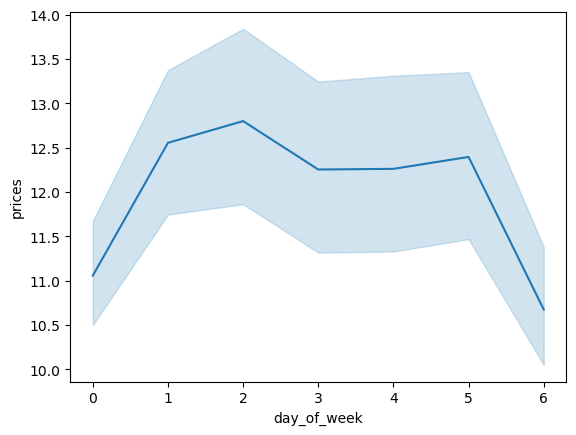

In [16]:
line3=sns.lineplot(data=df1, x='day_of_week', y='prices')

#### saving the plot

In [17]:
line3.figure.savefig(os.path.join(path, 'Prepared Data', 'day_of_week_smallsample.png'))

### 4. Creating lineplot from big sample

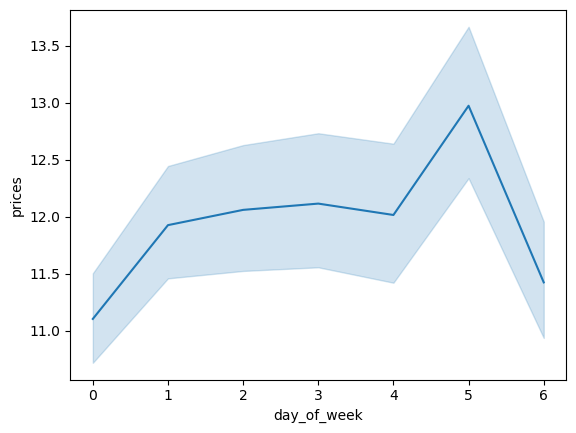

In [18]:
line4=sns.lineplot(data=df2, x='day_of_week', y='prices')

The lineplot demostrate 2 weekly peaks : 1st-2nd days of week and 5th day of week.The customers buy the more expansive goods at the beginning of the week and before week-ends.

#### saving plot

In [19]:
line4.figure.savefig(os.path.join(path, 'Prepared Data', 'day_of_week_bigsample.png'))

### 4.9.3 creating bar-chart about the distribution of orders among customers in terms of loyalty.

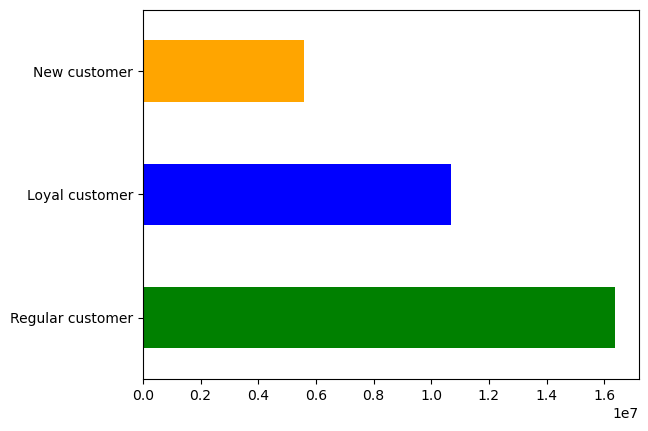

In [31]:
bar=df_concat['loyalty_flag'].value_counts().plot.barh(color=['green','blue','orange'])

#### this plot evidence that loyal customer are more accurate by ordering and choose more cheap items.

#### saving the plot

In [32]:
bar.figure.savefig(os.path.join(path, 'Prepared Data', 'Entire_Loyalty_barplot.png'))

#### - Creating visualisation to show proportions of customers with different number od dependants

In [34]:
df6=df_concat[['user_id', 'n_dependants']]

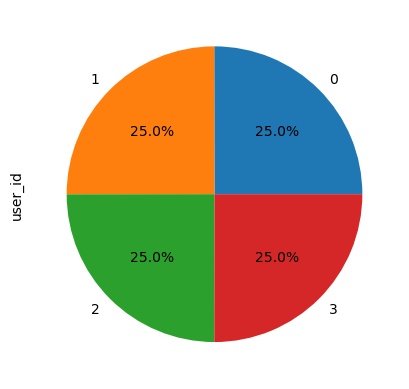

In [35]:
pie16=df6.groupby(['n_dependants'])['user_id'].nunique().plot(kind='pie', autopct='%.01f%%')

In [36]:
pie16.figure.savefig(os.path.join(path, 'Prepared Data', 'Entire_NDependansUsers.png'))

#### -Creating visualisation about days since prior order

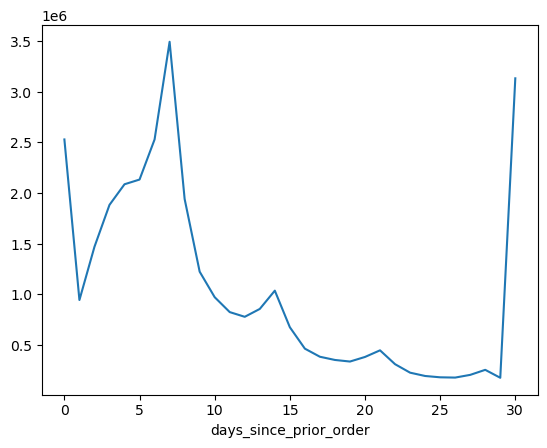

In [37]:
line17=df_concat.groupby('days_since_prior_order')['days_since_prior_order'].count().plot(kind='line')

In [38]:
line17.figure.savefig(os.path.join(path, 'Prepared Data', 'Entire_DaysSincePriorOrder.png'))

In [39]:
df_concat.groupby('days_since_prior_order')['days_since_prior_order'].count()

days_since_prior_order
0     2530121
1      945366
2     1470366
3     1884236
4     2087783
5     2134259
6     2529740
7     3493997
8     1942303
9     1224995
10     973160
11     826107
12     779672
13     857347
14    1037798
15     676796
16     465328
17     385436
18     353745
19     338148
20     383444
21     448778
22     312007
23     228291
24     195603
25     182496
26     179851
27     206593
28     256302
29     177861
30    3133339
Name: days_since_prior_order, dtype: int64

### 4.9.4 Checking whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

#### creating line plot for this checking from biggest sample

In [22]:
df3=big[['order_hour_of_day','prices']]

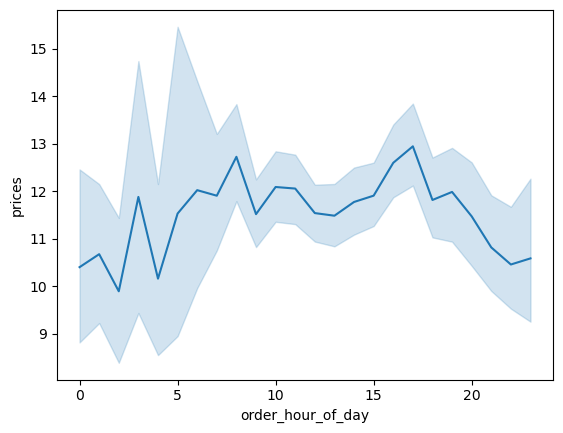

In [23]:
line1=sns.lineplot(data=df3, x='order_hour_of_day', y='prices')

#### saving the plot

In [24]:
line1.figure.savefig(os.path.join(path,'Prepared Data', 'EntireBig_hour_of_day_line.png'))

### 4.9.5 creating a line chart exploring the connections between age and number of dependents

In [25]:
df4=big[['n_dependants','Age']]

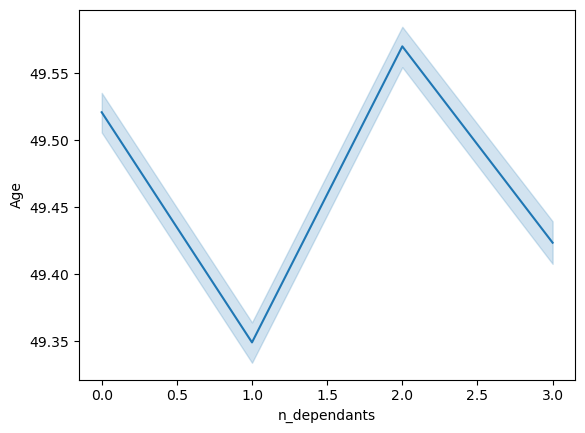

In [27]:
line=sns.lineplot(data=df4, x='n_dependants', y='Age')

#### The plot shows the most of customers are 2 membres of family or live alone.

#### saving the plot


In [ ]:
line.figure.savefig(os.path.join(path, 'Prepared Data', 'EntireBig_line_plot_dipendance.png'))

### 4.9.6 Exploring whether there’s a connection between age and spending power (income)

In [ ]:
scat=sns.scatterplot(x='Age', y='income', data=df_concat)

#### The scatterplot shows the customers after 40 years age spend like 40% more. 

### saving the plot

In [ ]:
scat.figure.savefig(os.path.join(path, 'Prepared Data', 'Entire_AgeIncome_scatterplot.png'))